## 개념 정리
### 용어 정리
- 선형회귀
    - 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형방정식을 찾음
    - 특성이 증가하면, N차 방정식이 되기도 함
    - 선형 회귀가 찾은 특성과 타깃 사이의 관계에는 선형 방정식의 계수 or 가중치에 저장됨. 이는 방정식의 기울기나 절편을 의미함.
- 모델 파라미터: 모델이 특성에서 학습한 파라미터를 의미함
- 다항 회귀: 다항식을 이용하여 특성과 타깃 사이의 관계를 나타냄.

### 핵심 패키지와 함수 (sklearn)
- LinearRegression: sklearn의 선형회귀 클래스
    - fit_intercept: False로 설정하면 절편을 학습하지 않음. 기본값은 True.
    - coef_ : 선형회귀 방정식에 대한 계수를 포함한 배열을 얻을 수 있는 속성값.
    - intercept_ : 선형회귀 방정식에 대한 절편이 저장된 값을 얻을 수 있는 속성값.

In [1]:
'''데이터 입력 받기'''
import numpy
import numpy as np

# 농어 데이터 입력
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [6]:
'''데이터 나누고, 편집하기'''
from sklearn.model_selection import train_test_split

# 훈련셋과 데이터셋으로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련셋과 테스트셋을 2차월 배열로 변환
train_input = train_input.reshape(-1,1)
train_target = train_target.reshape(-1,1)
test_input = test_input.reshape(-1,1)
test_target = test_target.reshape(-1,1)

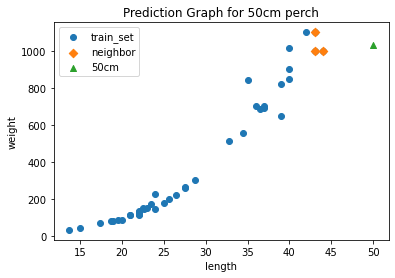

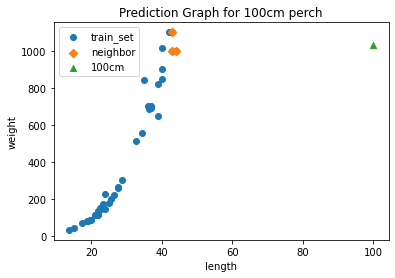

In [23]:
'''K-최근접 이웃 회귀 모델'''
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

KNR = KNeighborsRegressor(n_neighbors=3)
KNR.fit(train_input,train_target)
KNR.predict([[50]])

# 50cm 농어의 이웃을 구함
distances, indexes = KNR.kneighbors([[50]])
plt.title('Prediction Graph for 50cm perch')
# 훈련셋의 산점도를 구함
plt.scatter(train_input,train_target, label = "train_set")
# 훈련셋 중에서 이웃 샘플만 구함
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label = "neighbor")
# 50cm 농어 데이터
plt.scatter(50, 1033, marker="^", label = "50cm")
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

# 100cm 농어의 이웃을 구함
distances, indexes = KNR.kneighbors([[100]])
plt.title('Prediction Graph for 100cm perch')
# 훈련셋의 산점도를 구함
plt.scatter(train_input,train_target, label = "train_set")
# 훈련셋 중에서 이웃 샘플만 구함
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label = "neighbor")
# 50cm 농어 데이터
plt.scatter(100, 1033, marker="^", label = "100cm")
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

In [36]:
'''선형회귀 모델'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 선형회귀 모델을 훈련함
LR = LinearRegression()
LR.fit(train_input, train_target)
print(LR.predict([[50]])) # 농어길이가 50cm일 때, 예측되는 무게

# 선형방정식의 기울기(coef_)와 절편(intercept_) -> 방정식의 가중치, 모델 파라미터(모댈이 파라미터에서 학습한 특성)
print(LR.coef_, LR.intercept_)

# 선형회귀에 대한 예측점수 구하기
print(LR.score(train_input, train_target))
print(LR.score(test_input, test_target))

[[1241.83860323]]
[[39.01714496]] [-709.01864495]
0.9398463339976041
0.8247503123313562


(42, 2) (14, 2)
[[  1.01433211 -21.55792498]] [116.05021078]


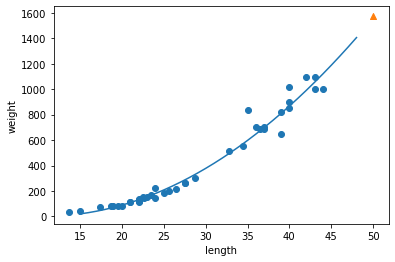

0.9706807451768623
0.9775935108325122


In [51]:
'''다항 회귀(Polynomial Regression)'''
# 다항 회귀를 구하기 위해, 길이를 제곱한 값을 구함 (y = ax^2 + bx + c; x는 길이, y는 무게)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

# 다항회귀 학습 시키기
LR = LinearRegression()
LR.fit(train_poly, train_target)
LR.predict([[50 ** 2, 50]])
print(LR.coef_, LR.intercept_)

'''다항회귀 시각화하기'''
# 구간별 직선을 그리기 위해 15 - 49까지 정수배열을 만듦
point = np.arange(15,49)
# 훈련셋의 산점도를 그림
plt.scatter(train_input,train_target)
# 15 - 49까지의 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어에 대한 그래프
plt.scatter(50,1574, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 훈련셋과 테스트셋의 결정계수 구하기
print(LR.score(train_poly, train_target))
print(LR.score(test_poly, test_target))